<a href="https://colab.research.google.com/github/oliverturpo/APRENDIZAJE-SUPERVISADO/blob/main/clase06_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris







In [8]:
X, y = load_iris(return_X_y=True)


In [9]:
modelo = LogisticRegression(max_iter=100)

In [21]:
K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)



In [22]:
metricas = cross_validate(modelo, X, y, cv=kf, return_train_score=True)
metricas

{'fit_time': array([0.05235052, 0.04428172, 0.02552223, 0.02477026, 0.01779461,
        0.01672268, 0.02103972, 0.02932501, 0.04868245, 0.02423978]),
 'score_time': array([0.002527  , 0.00115061, 0.0011518 , 0.0013628 , 0.00111294,
        0.00118589, 0.00152946, 0.00252891, 0.00137424, 0.00110817]),
 'test_score': array([1.        , 1.        , 1.        , 1.        , 1.        ,
        0.86666667, 0.93333333, 1.        , 1.        , 0.93333333]),
 'train_score': array([0.97777778, 0.97037037, 0.97037037, 0.97777778, 0.97777778,
        0.99259259, 0.98518519, 0.97037037, 0.97777778, 0.97037037])}

In [23]:
test_score = metricas['test_score']
train_score = metricas['train_score']

In [30]:
print(f"Promedio de rendimiento test: {np.mean(test_score):.3f} y std {np.std(test_score)}")
print(f"Promedio de rendimiento train: {np.mean(train_score):.3f}")

Promedio de rendimiento test: 0.973 y std 0.04422166387140532
Promedio de rendimiento train: 0.977


In [42]:
means_test_score = []
means_train_score = []
std_test_score = []
std_train_score = []
K = []

for k in range(5, 11):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    metricas = cross_validate(modelo, X, y, cv=kf, return_train_score=True)
    test_score = metricas['test_score']
    train_score = metricas['train_score']

    means_test_score.append(np.mean(test_score))
    means_train_score.append(np.mean(train_score))
    std_test_score.append(np.std(test_score))
    std_train_score.append(np.std(train_score))
    K.append(k)




/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

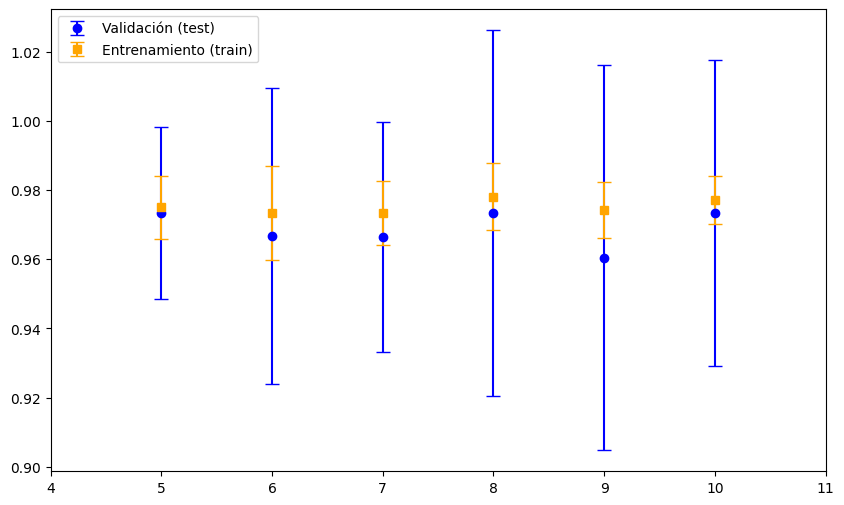

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.xlim(4,11)
#plt.xticks(range(4,11,1))

plt.errorbar(K, means_test_score, yerr=std_test_score, fmt='o', capsize=5, label='Validación (test)', color='blue')
plt.errorbar(K, means_train_score, yerr=std_train_score, fmt='s', capsize=5, label='Entrenamiento (train)', color='orange')
plt.legend()

plt.show()
